<a href="https://colab.research.google.com/github/va4756/big_RaeJung/blob/main/bigdata_RaeJung_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 104_지도학습_평가

## 1.회귀 평가

### 1.1 회귀 평가 지표

In [2]:
!git clone https://github.com/leeraejung/RaejungLecture-MachineLearning.git

Cloning into 'RaejungLecture-MachineLearning'...
remote: Enumerating objects: 711, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 711 (delta 0), reused 5 (delta 0), pack-reused 703 (from 1)
Receiving objects: 100% (711/711), 50.53 MiB | 14.13 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Updating files: 100% (692/692), done.


In [3]:
!pip install numpy matplotlib scikit-learn pandas
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 11.1 MB/s eta 0:00:00


In [4]:
import logging
import matplotlib.pyplot as plt

# 로그 레벨 설정
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mglearn

plt.rc('figure', figsize=(10, 6))

from matplotlib import rcParams
rcParams['font.family'] = 'NanumBarunGothic'
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

### 1.8.1 회귀 예제 데이터 - diabetes

### 1.2 선형 회귀 적용 - 보스턴 집값 예측

#### 1.2.1 데이터 로딩

In [6]:
# 데이터 로딩
df = pd.read_csv('/content/RaejungLecture-MachineLearning/Lecture/data/boston.csv')
print(df.shape)
df.columns

(506, 14)


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [7]:
X = df.drop('target', axis=1).values
y = df['target'].values
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### 1.2.2 데이터 탐색

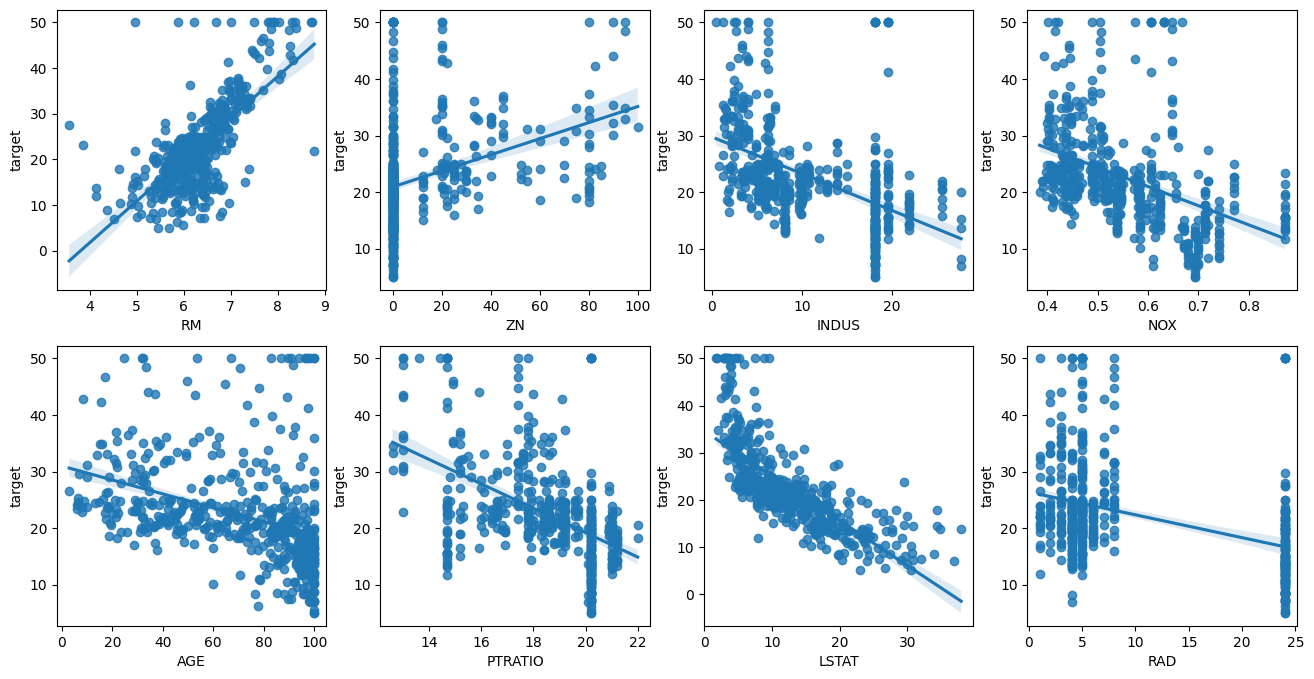

In [8]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)

col_list = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

for i, feature in enumerate(col_list):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='target', data=df, ax=axs[row][col])

plt.show()

#### 1.2.3 선형 회귀 분석

In [9]:
# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [10]:
# Linear Regression
from sklearn.linear_model import LinearRegression

# 모델 생성
model = LinearRegression(fit_intercept=True)

In [11]:
# 모델 학습
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# 결과 예측
pred = model.predict(X_test)
print(pred.shape)
pred

(127,)


array([16.29286997, 27.88790589, 39.41456053, 18.37096451, 30.16518358,
       37.77794671, 25.36606436, 10.39741797, 14.74083652, 31.73078036,
       28.79292061, 19.1471567 , 13.81677825, 31.83932417, 16.49252123,
       21.47578303, 20.38810822, 37.71686776, 18.11178137, 15.78990777,
       13.7771029 , 24.49111234, 33.08173484, 39.52018398, 31.52573143,
       22.34110087, 17.65956144, 20.81329507, 23.34233612, 20.61052169,
       25.84461476, 33.97409459, 15.35704895, 21.95151795, 24.08989232,
       34.77474387, 29.21132206, 18.24716868, 13.92911938, 38.43793451,
       31.00188414, 18.77580256, 19.7698502 , 40.50221132,  8.12937003,
       27.19648109, 19.26132809, 25.65669217, 15.45600034, 25.92350904,
       34.75585974, 24.34306909, 19.59508197, 12.40858537, 24.55946383,
       17.97968819,  9.72456537,  2.27891777, 31.46417649, 13.59430001,
       19.99441875, 22.53304075, 20.26468044, 17.83848399, 25.05876782,
       27.03508049, 25.90862078, 22.28206346, 24.65401423, 30.38

#### 1.2.4 선형 회귀 평가

In [13]:
from sklearn import metrics

In [14]:
# Coefficient
model.coef_

array([-9.78910352e-02,  4.27789348e-02,  5.91493507e-02,  1.23149832e+00,
       -1.54902558e+01,  4.35215724e+00, -4.69136797e-04, -1.37720645e+00,
        2.82085749e-01, -1.24919445e-02, -9.40011503e-01,  6.62260713e-03,
       -5.48551054e-01])

In [15]:
# intercept
model.intercept_

32.47966480453227

In [16]:
# MAE(Mean Absolute Error)
metrics.mean_absolute_error(y_test, pred)

3.4377496008465154

In [17]:
# MSE(Mean Squared Error)
metrics.mean_squared_error(y_test, pred)

24.768530968608456

In [18]:
# RMSE(Root Mean Squared Error)
metrics.mean_squared_error(y_test, pred)**0.5

4.9767992694711385

In [19]:
# R square
metrics.r2_score(y_test, pred)

0.6862448857295769

In [20]:
# MAPE
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - pred) / y_test)) * 100

MAPE(y_test, pred)

16.631873933714093

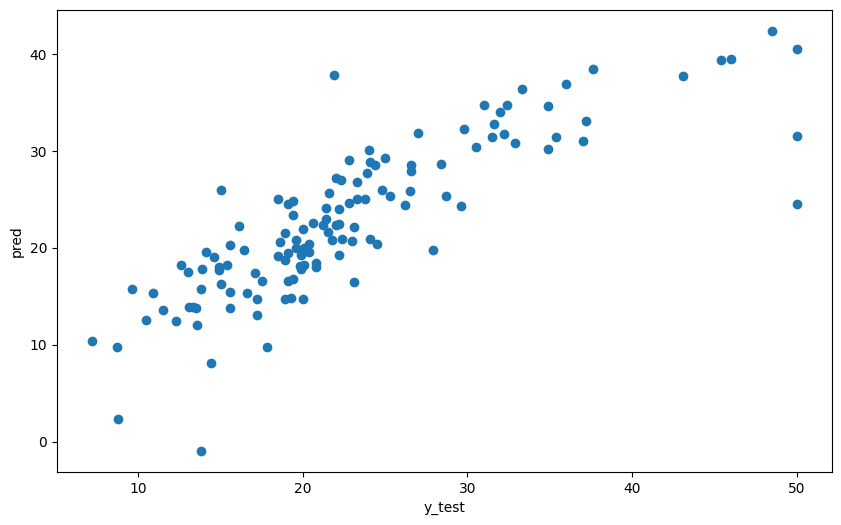

In [21]:
# Regression plot
plt.scatter(y_test, pred)
plt.xlabel('y_test')
plt.ylabel('pred')
plt.show()

#### 1.2.5 cross_val_score

In [22]:
from sklearn.model_selection import cross_val_score
neg_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)

scores = np.sqrt(-1 * neg_scores)

print('교차 검증 점수: ', scores)
print('교차 검증 평균 점수: {:.2f}'.format(scores.mean()))

교차 검증 점수:  [3.52991509 5.10378498 5.75101191 8.9867887  5.77179405]
교차 검증 평균 점수: 5.83


## 2.분류 평가

### Accuracy,Precision, Recall, F1-score, ROC Curve, AUC

### 2.1 불균형 데이터 셋

In [23]:
# 데이터 로딩
from sklearn.datasets import load_digits
digits = load_digits()

In [24]:
# 불균형 데이터 셋 생성
X = digits.data
y = digits.target == 9

In [25]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

#### 2.1.1 더미 분류기 1 - 빈도 기반

In [26]:
from sklearn.dummy import DummyClassifier

model_dummy1 = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_dummy1 = model_dummy1.predict(X_test)

In [27]:
model_dummy1.score(X_test, y_test)

0.9066666666666666

#### 2.1.2 더미 분류기 2 - 무작위

In [28]:
model_dummy2 = DummyClassifier().fit(X_train, y_train)
pred_dummy2 = model_dummy2.predict(X_test)

In [29]:
model_dummy2.score(X_test, y_test)

0.9066666666666666

#### 2.1.3 결정 트리

In [30]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = model_tree.predict(X_test)

In [31]:
model_tree.score(X_test, y_test)

0.9244444444444444

#### 2.1.4 Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = model_logreg.predict(X_test)

In [33]:
model_logreg.score(X_test, y_test)

0.9888888888888889

### 2.2 오차 행렬(Confusion Matrix)

In [34]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)

print('Confusion Matrix:\n', confusion)

Confusion Matrix:
 [[404   4]
 [  1  41]]


In [35]:
pd.crosstab(y_test, pred_logreg, margins=True)

col_0,False,True,All
row_0,,,
False,404,4,408
True,1,41,42
All,405,45,450


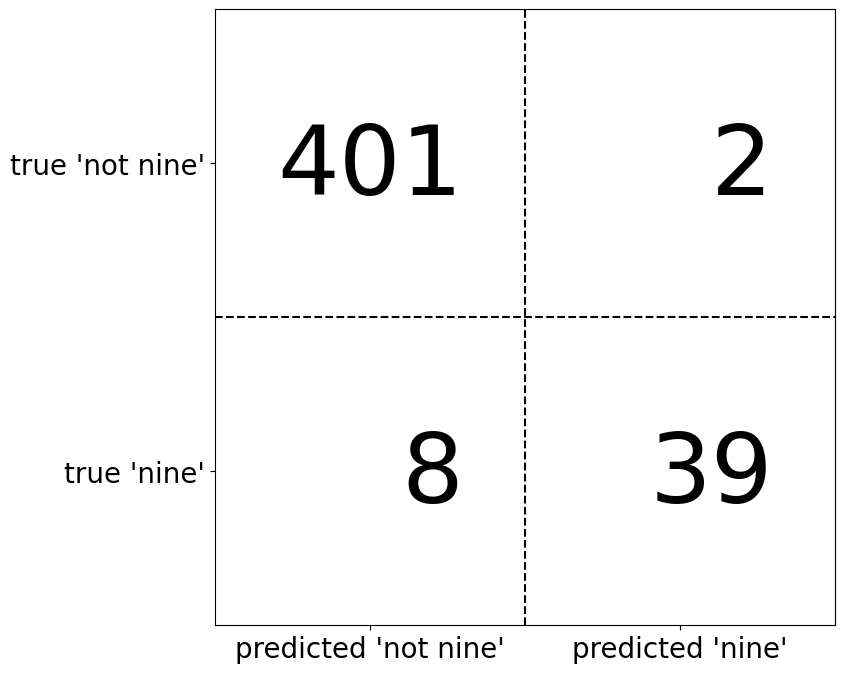

In [36]:
mglearn.plots.plot_confusion_matrix_illustration()

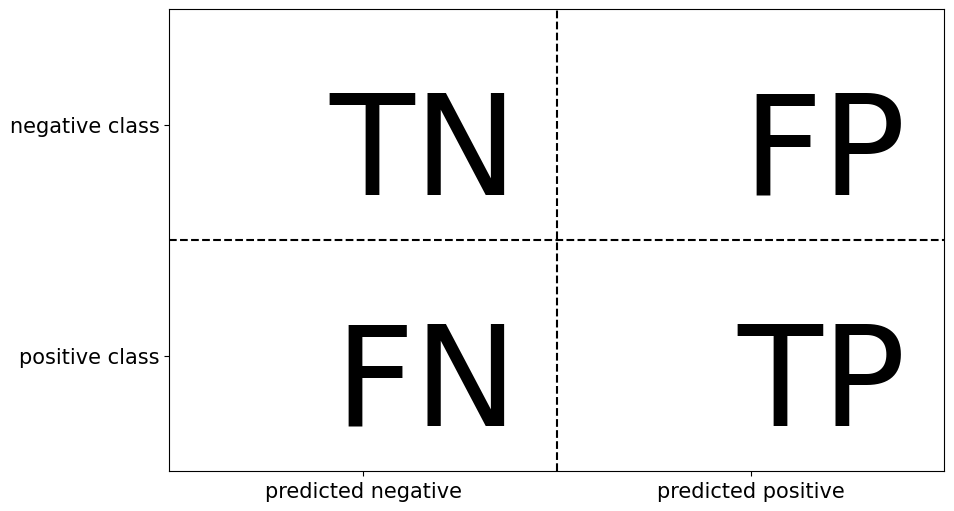

In [37]:
mglearn.plots.plot_binary_confusion_matrix()

#### 2.2.1 각 모델별 오차 행렬(Confusion Matrix)

In [38]:
print('1. 빈도 기반 더미 모델')
print(confusion_matrix(y_test, pred_dummy1))

print('\n2. 무작위 더미 모델')
print(confusion_matrix(y_test, pred_dummy2))

print('\n3. 결정 트리')
print(confusion_matrix(y_test, pred_tree))

print('\n4. 로지스틱 회귀')
print(confusion_matrix(y_test, pred_logreg))

1. 빈도 기반 더미 모델
[[408   0]
 [ 42   0]]

2. 무작위 더미 모델
[[408   0]
 [ 42   0]]

3. 결정 트리
[[383  25]
 [  9  33]]

4. 로지스틱 회귀
[[404   4]
 [  1  41]]


### 2.3 분류 평가 지표

#### (정확도(Accuracy)), (정밀도(Precision)), (재현율(Recall)), (F1 스코어)

In [39]:
# Accuracy
metrics.accuracy_score(y_test, pred_logreg)

0.9888888888888889

In [40]:
# Precision
metrics.precision_score(y_test, pred_logreg)

0.9111111111111111

In [41]:
# Recall
metrics.recall_score(y_test, pred_logreg)

0.9761904761904762

In [42]:
# F1-score
metrics.f1_score(y_test, pred_logreg)

0.9425287356321839

#### 2.3.1 각 모델별 F1-score

In [43]:
from sklearn.metrics import f1_score

print('1. 빈도 기반 더미 모델: {:.2f}'.format(f1_score(y_test, pred_dummy1)))
print('2. 무작위 더미 모델: {:.2f}'.format(f1_score(y_test, pred_dummy2)))
print('3. 결정 트리: {:.2f}'.format(f1_score(y_test, pred_tree)))
print('4. 로지스틱 회귀: {:.2f}'.format(f1_score(y_test, pred_logreg)))

1. 빈도 기반 더미 모델: 0.00
2. 무작위 더미 모델: 0.00
3. 결정 트리: 0.66
4. 로지스틱 회귀: 0.94


#### 2.3.2 각 모델별 Classification Report

In [44]:
# 1. 빈도 기반 더미 모델
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_dummy1, target_names=['9 아님', '9'],
                            zero_division=0))

              precision    recall  f1-score   support

        9 아님       0.91      1.00      0.95       408
           9       0.00      0.00      0.00        42

    accuracy                           0.91       450
   macro avg       0.45      0.50      0.48       450
weighted avg       0.82      0.91      0.86       450



In [45]:
# 2. 무작위 더미 모델
print(classification_report(y_test, pred_dummy2, target_names=['9 아님', '9'],
                            zero_division=0))

              precision    recall  f1-score   support

        9 아님       0.91      1.00      0.95       408
           9       0.00      0.00      0.00        42

    accuracy                           0.91       450
   macro avg       0.45      0.50      0.48       450
weighted avg       0.82      0.91      0.86       450



In [46]:
# 3. 결정 트리
print(classification_report(y_test, pred_tree, target_names=['9 아님', '9']))

              precision    recall  f1-score   support

        9 아님       0.98      0.94      0.96       408
           9       0.57      0.79      0.66        42

    accuracy                           0.92       450
   macro avg       0.77      0.86      0.81       450
weighted avg       0.94      0.92      0.93       450



In [47]:
# 4. 로지스틱 회귀
print(classification_report(y_test, pred_logreg, target_names=['9 아님', '9']))

              precision    recall  f1-score   support

        9 아님       1.00      0.99      0.99       408
           9       0.91      0.98      0.94        42

    accuracy                           0.99       450
   macro avg       0.95      0.98      0.97       450
weighted avg       0.99      0.99      0.99       450



#### 2.3.3 임계값 조정

In [56]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

In [57]:
# 데이터 로딩
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=123)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# 모델 생성 및 학습
svc = SVC(gamma=0.05).fit(X_train, y_train)

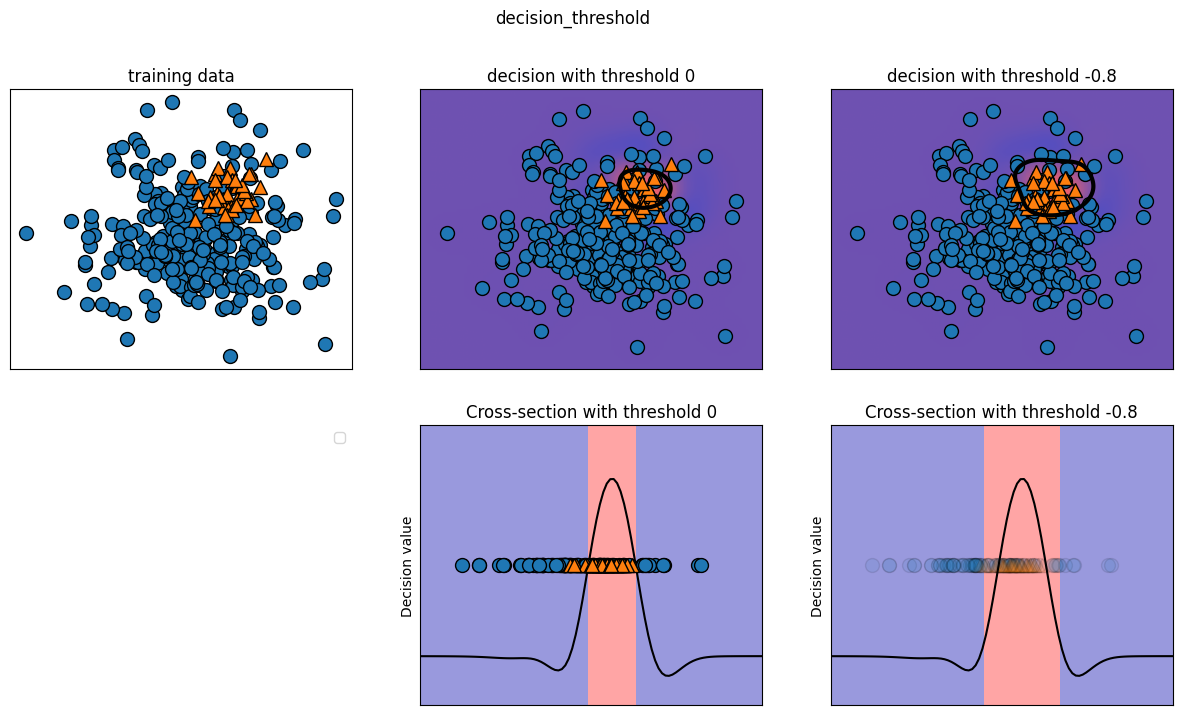

In [58]:
mglearn.plots.plot_decision_threshold()

In [59]:
# Classification Report - threshold: 0.5
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       102
           1       0.60      0.82      0.69        11

    accuracy                           0.93       113
   macro avg       0.79      0.88      0.83       113
weighted avg       0.94      0.93      0.93       113



In [60]:
print(y_test.shape, svc.predict(X_test).shape)

(113,) (113,)


In [61]:
# 임계값 수정된 결과 예측
pred_lower_threshold = svc.decision_function(X_test) > -0.8

In [62]:
# Classification Report - lower threshold
print(classification_report(y_test, pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       102
           1       0.55      1.00      0.71        11

    accuracy                           0.92       113
   macro avg       0.78      0.96      0.83       113
weighted avg       0.96      0.92      0.93       113



#### 2.3.4 ROC Curve

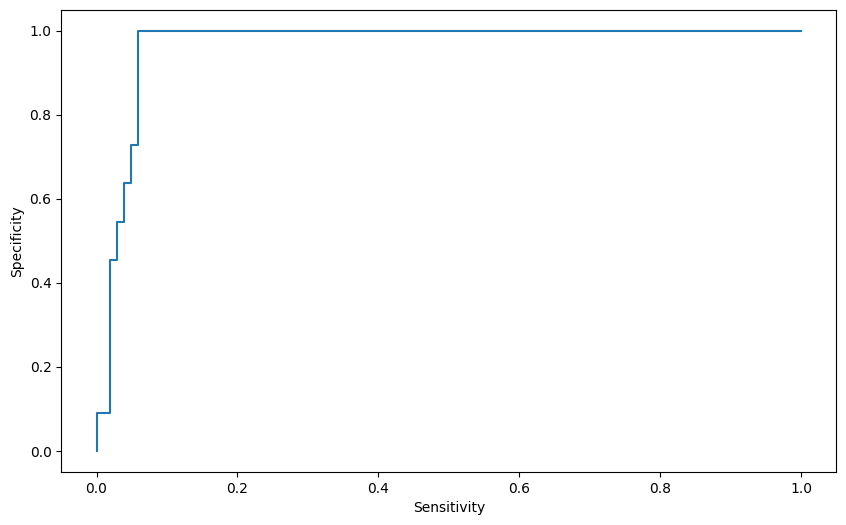

In [63]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('Sensitivity')
plt.ylabel('Specificity')   # 특이도
plt.show()

In [64]:
# 데이터 로딩 및 분할
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# 데이터 로딩
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=123)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [66]:
# SVC 모델 생성 및 학습
from sklearn.svm import SVC
svc = SVC(gamma=0.05)
svc.fit(X_train, y_train)

SVC(gamma=0.05)

In [67]:
# 랜덤 포레스트 모델 생성 및 학습
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=123, max_features=2)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=2, random_state=123)

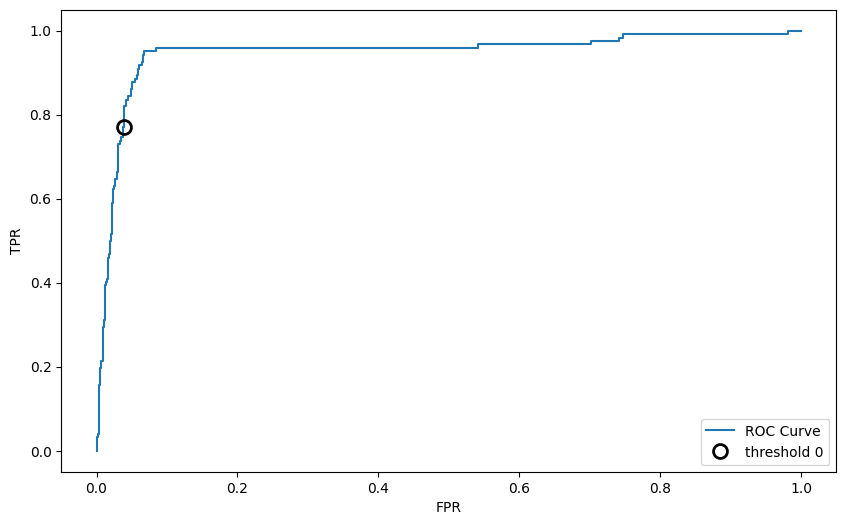

In [69]:
# ROC Curve - SVC

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')  # 재현율

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label='threshold 0', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)
plt.show()

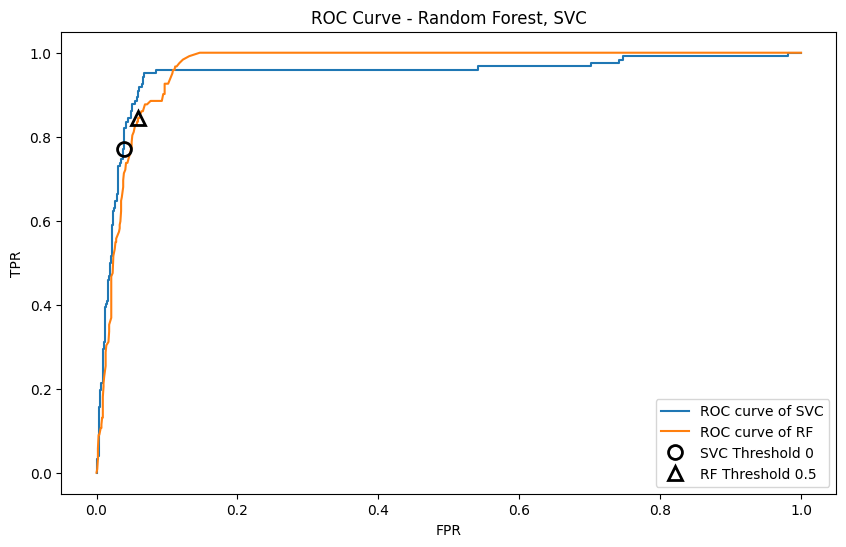

In [71]:
# ROC Curve - Random Forest, SVC

from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label='ROC curve of SVC')
plt.plot(fpr_rf, tpr_rf, label='ROC curve of RF')

plt.title('ROC Curve - Random Forest, SVC')
plt.xlabel('FPR')
plt.ylabel('TPR')  # 재현율

plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label='SVC Threshold 0', fillstyle='none', c='k', mew=2)

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_zero], tpr_rf[close_zero], '^', markersize=10,
         label='RF Threshold 0.5', fillstyle='none', c='k', mew=2)

plt.legend(loc=4)
plt.show()

#### 2.3.5 AUC

In [72]:
from sklearn.metrics import roc_auc_score

svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

In [73]:
print('AUC - SVC: {:.3f}\n'.format(svc_auc))
print('AUC - RandomForest: {:.3f}'.format(rf_auc))

AUC - SVC: 0.948

AUC - RandomForest: 0.965


In [ ]:
# 불균형 데이터 셋 ROC Curve

